**Andrew Wang's Data Science 100 Project Proposal**

*Introduction*:  
Heart disease is a serious medical condition that can drastically alter an individual's life. It is important for both data analysts and medical professionals to be able to predict when someone is at risk of developing heart disease as this can lead to immediate lifestyle adjustments/medical attention that can help people live longer. The database I will be analyzing is a collection of variables such as age, sex, and cholesterol from a study on heart disease conducted by Andras Janosi, William Steinburnn, Matthias Pfisterer, and Robert Detrano. The data used in this project will be obtained from the processed data of Switzerland. The purpose of this project and using this database is to answer the following question:  
**"Is it possible to accurately diagnose heart disease based solely on an individual's resting blood pressure and serum cholesterol?"**  
This is a classification problem where in this project, I am going to be building a model that will take in two variables: an individuals resting blood pressure and amount of serum cholesterol and try to predict whether or not this individual will have heart disease.      

*Preliminary exploratory data analysis:*  
The first step in answering my question is to identify the necessary libraries required to complete the data analysis. The following libraries below are going to be used in this project.

In [22]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

Next we need to read the data into R. This can be done using the read_csv function as the delim of the data file is a comma. We must also specify in the read_csv function that the data itself does not contain column names.

In [43]:
data <- read_csv("data/heart_disease/processed.switzerland.data", col_names = FALSE)
data

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X6, X7, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X5, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
32,1,1,95,0,?,0,127,0,.7,1,?,?,1
34,1,4,115,0,?,?,154,0,.2,1,?,?,1
35,1,4,?,0,?,0,130,1,?,?,?,7,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,?,2,114,0,1.6,2,2,?,0
73,0,3,160,0,0,1,121,0,0,1,?,3,1
74,1,2,145,0,?,1,123,0,1.3,1,?,?,1


We have successfully loaded the data into R, but it is not in a tidy format. We must clean and wrangle the data to make it visually appearing and easier to work with.

In [44]:
data <- data |>
       rename(resting_bp = X4, cholestoral = X5, heart_disease = X14)

In [50]:
data <- select(data, resting_bp, cholestoral, heart_disease) |>
        filter(resting_bp != "?") |>
        filter(cholestoral != "?") |>
        filter(heart_disease != "?")

resting_bp,cholestoral,heart_disease
<chr>,<dbl>,<dbl>
95,0,1
115,0,1
110,0,1
⋮,⋮,⋮
160,0,0
160,0,1
145,0,1


In [51]:
data <- data %>%
        mutate(heart_disease = case_when(
            heart_disease == 0 ~ 0,
            heart_disease %in% c(1, 2, 3, 4) ~ 1
            ))

We have selected the columns we are going to be using, added column names, removed missing values, and changed the heart_disease to contain only values of 0 and 1 where 0 represents no heart disease and 1 is any degree of heart disease. Now the data must be split into 2 sections: one for training the model and one for testing the model.

In [57]:
data_split <- initial_split(data, prop = 0.75, strata = heart_disease)
data_train <- training(data_split)
data_test <- testing(data_split)

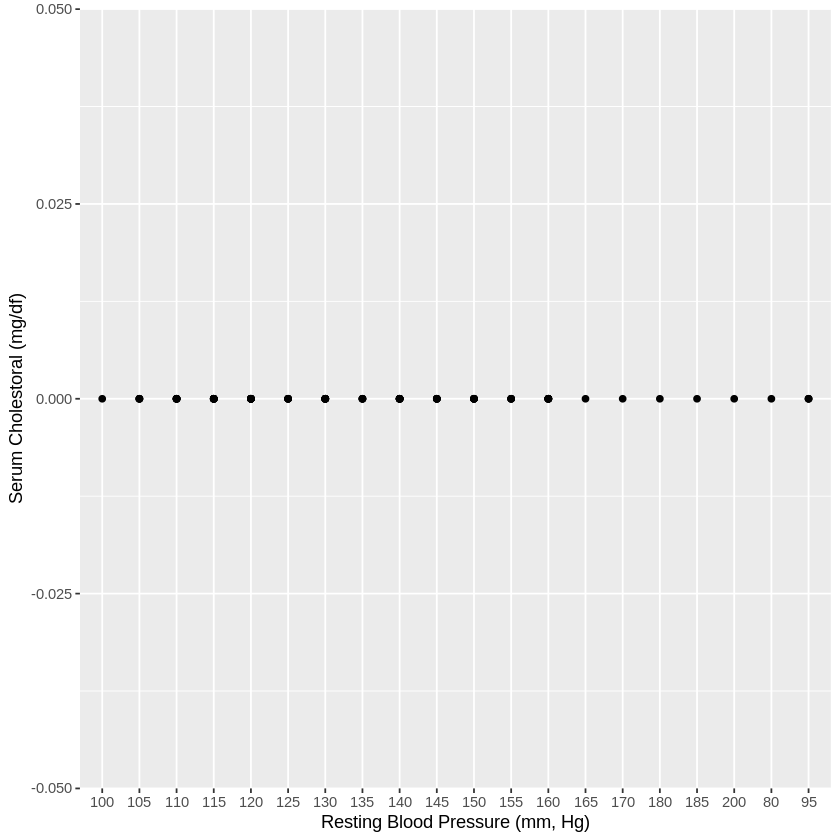

In [58]:
training_plot <- data_train |>
                 ggplot(aes(x = resting_bp, y = cholestoral)) +
                 geom_point() +
                 labs(x = "Resting Blood Pressure (mm, Hg)", y = "Serum Cholestoral (mg/df)")
training_plot